<a href="https://colab.research.google.com/github/JuanYa1901/Entrega_5_Deep_Learning/blob/main/620454_Evaluacion_4_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evaluación 4: Deep Lerning

**Autores:**
- Integrante 1: Leonardo Bustos Vallejos
- Integrante 2: Javier Villena Novoa
- Integrante 3: Juan Yáñez Romero

- Correo Electrónico: leonardo.bustos2001@alumnos.ubiobio.cl
- Correo Electrónico: javier.villena2101@alumnos.ubiobio.cl
- Correo Electrónico: juan.yanez1901@alumnos.ubiobio.cl

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

In [2]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)

In [3]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
np.unique(labs_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

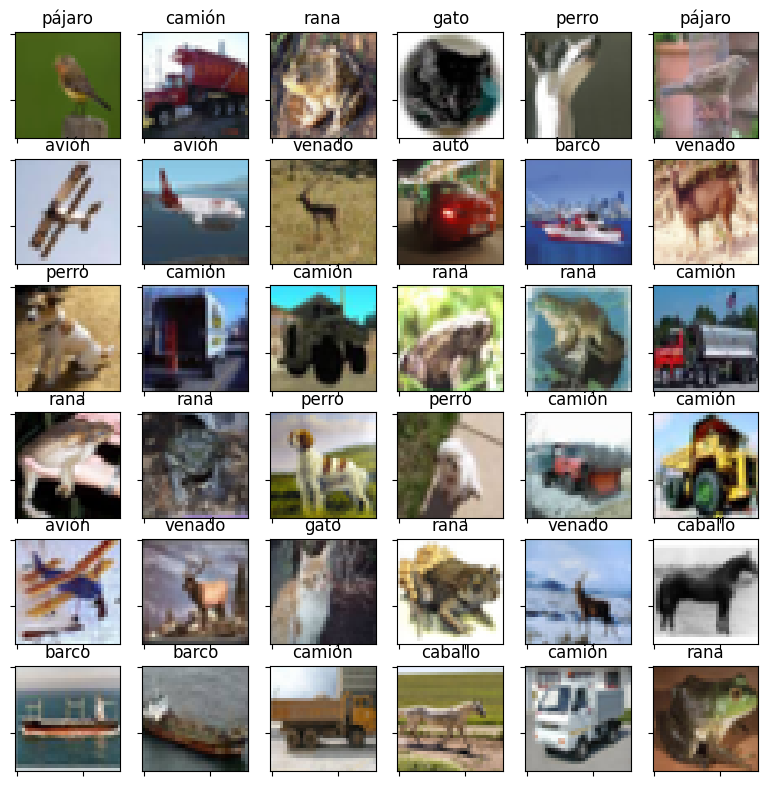

In [6]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_train))
    axs[i,j].set_title(nombres[labs_train[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_train[ex])

In [7]:
# Tranforma los datos para el entrenamiento,
# Necesita transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
# Normaliza
X_train = X_train / 255
X_test = X_test / 255

print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [8]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X_train.shape[0]
N = X_train.shape[1]
C = Y_train.shape[1]

print(M,N,C)

50000 3072 10


In [9]:
# Crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Red_Evaluacion")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Primera_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Segunda_capa"))
red.add(keras.layers.Dense(h2, activation='relu', name="Tercera_capa"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Red_Evaluacion"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_salida (Dense)             │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrena la red
num_epocas = 5
x_batch_size = 128
start_time_base = time()
history = red.fit(X_train, Y_train,
                        epochs = num_epocas,
                        batch_size=x_batch_size,
                        validation_data=(X_test,Y_test))

end_time_base = time()
tiempo_base = end_time_base - start_time_base

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.2396 - loss: 2.0964 - val_accuracy: 0.3184 - val_loss: 1.8794
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3510 - loss: 1.8342 - val_accuracy: 0.3653 - val_loss: 1.7776
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3865 - loss: 1.7506 - val_accuracy: 0.3880 - val_loss: 1.7171
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.4038 - loss: 1.6943 - val_accuracy: 0.4022 - val_loss: 1.6770
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.4191 - loss: 1.6511 - val_accuracy: 0.4192 - val_loss: 1.6406


# Evaluación

## Experimentación

### Agregar más capas o más neuronas

Nota. Uno de los experimentos DEBE obtener un accuracy superior al 90%

###Capas

#### Experimento 1 - 1 punto

In [16]:
# Crea una red más profunda (solo densas)
h1 = 1024
h2 = 512
h3 = 256

red = keras.Sequential(name="Red_Experimento1")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu', name="Capa_1"))
red.add(keras.layers.Dense(h2, activation='relu', name="Capa_2"))
red.add(keras.layers.Dense(h3, activation='relu', name="Capa_3"))
red.add(keras.layers.Dense(h3, activation='relu', name="Capa_4"))
red.add(keras.layers.Dense(C, activation='softmax', name="Capa_salida"))

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

start_time_Capas = time()

history_Capas = red.fit(X_train, Y_train,
                  epochs=10,
                  batch_size=128,
                  validation_data=(X_test, Y_test))

end_time_Capas = time()
tiempo_Capas = end_time_Capas - start_time_Capas

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.2508 - loss: 2.0565 - val_accuracy: 0.3958 - val_loss: 1.6930
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.3814 - loss: 1.7157 - val_accuracy: 0.4186 - val_loss: 1.6331
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.4252 - loss: 1.6084 - val_accuracy: 0.4430 - val_loss: 1.5706
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.4495 - loss: 1.5402 - val_accuracy: 0.4597 - val_loss: 1.5226
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.4684 - loss: 1.4915 - val_accuracy: 0.4726 - val_loss: 1.4902
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.4859 - loss: 1.4372 - val_accuracy: 0.4820 - val_loss: 1.4710
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.4997 - loss: 1.4006 - val_accuracy: 0.4857 - val_loss: 1.4505
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 84ms/step - accuracy: 0.5133 - loss: 1.3603 - 

#### Experimento 2 - 1 punto

###CNN

In [12]:
# Normalizar datos
X_train_cnn = imgs_train / 255.0
X_test_cnn = imgs_test / 255.0

Y_train_cnn = tf.keras.utils.to_categorical(labs_train, 10)
Y_test_cnn = tf.keras.utils.to_categorical(labs_test, 10)

# Modelo CNN
cnn = tf.keras.models.Sequential(name="CNN_Experimento2")
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(tf.keras.layers.Dropout(0.35))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

start_time_cnn = time()

history_cnn = cnn.fit(X_train_cnn, Y_train_cnn,
                  epochs=30,
                  batch_size=64,
                  validation_data=(X_test_cnn, Y_test_cnn))


end_time_cnn = time()
tiempo_cnn = end_time_cnn - start_time_cnn

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 334s 420ms/step - accuracy: 0.3635 - loss: 2.0391 - val_accuracy: 0.5721 - val_loss: 1.1894
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 388s 428ms/step - accuracy: 0.5568 - loss: 1.2478 - val_accuracy: 0.6122 - val_loss: 1.1155
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 377s 421ms/step - accuracy: 0.6398 - loss: 1.0303 - val_accuracy: 0.7002 - val_loss: 0.8789
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 377s 415ms/step - accuracy: 0.6854 - loss: 0.9044 - val_accuracy: 0.7108 - val_loss: 0.8352
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 416ms/step - accuracy: 0.7119 - loss: 0.8302 - val_accuracy: 0.7030 - val_loss: 0.8700
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 380s 414ms/step - accuracy: 0.7377 - loss: 0.7574 - val_accuracy: 0.7428 - val_loss: 0.7687
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 414ms/step - accuracy: 0.7535 - loss: 0.7098 - val_accuracy: 0.7382 - val_loss: 0.7668
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 382s 414ms/step - accuracy: 0.7699 -

### Descripción de arquitectura de las redes de los experimentos

#### Red experimento 1 - 1 punto

---Capa

Se construyó una red neuronal completamente conectada (fully connected), también conocida como red densa profunda, compuesta únicamente por capas Dense. Esta red tiene como propósito evaluar el desempeño de una arquitectura tradicional frente a una red convolucional en tareas de clasificación multiclase.

La arquitectura definida consta de:

Una capa de entrada con tamaño igual al número de características (N) de las imágenes preprocesadas.

Cuatro capas densas ocultas de tamaños decrecientes (1024, 512, 256 y 256 neuronas), todas con función de activación ReLU.

Una capa de salida con C neuronas (una por clase), con activación softmax para clasificación multiclase.

La red fue compilada utilizando el optimizador Adam y la función de pérdida categorical_crossentropy, con precisión (accuracy) como métrica principal. Se entrenó durante 10 épocas con un tamaño de lote de 128, validando en cada época con el conjunto de prueba.

Aunque esta red es más simple en estructura que una CNN y no aprovecha la información espacial de las imágenes, sirve como línea base para comparar el rendimiento de arquitecturas más especializadas como las convolucionales.


#### Red experimento 2 - 1 punto

---CNN

Se implementó una Red Neuronal Convolucional (CNN) con el objetivo de mejorar el rendimiento en la clasificación de imágenes, en comparación con una red densa tradicional.

La arquitectura empleada se compone de múltiples capas convolucionales (Conv2D) que permiten extraer automáticamente características locales de las imágenes, seguidas por capas de normalización por lotes (BatchNormalization) para estabilizar y acelerar el entrenamiento. Se añadieron capas de submuestreo (MaxPooling2D) para reducir la dimensionalidad, así como capas de abandono (Dropout) que ayudan a prevenir el sobreajuste.

Posteriormente, se aplanaron las salidas con Flatten() y se conectó una capa densa de 512 neuronas con activación ReLU, seguida de una capa de salida con activación softmax para realizar la clasificación multiclase sobre 10 clases.

El modelo fue entrenado durante 30 épocas con un tamaño de lote de 64, utilizando el optimizador Adam y categorical_crossentropy como función de pérdida. Se aplicó normalización previa dividiendo los valores de píxeles por 255.

Esta red logró una mayor capacidad de generalización, a costa de un tiempo de entrenamiento considerablemente mayor respecto al modelo del Experimento 1. Aun así, su estructura demuestra una clara ventaja en tareas de clasificación de imágenes complejas, al capturar relaciones espaciales y jerárquicas entre los píxeles.


## Análisis comparativo

### Mostrar los tiempos que tomó el entrenamiento entre el modelo base y los 2 experimentos - 0,1 puntos

In [17]:
# Mostrar tiempos en minutos y segundos
print(f"Tiempo base: {tiempo_base:.2f} segundos ({tiempo_base // 60:.0f} min {tiempo_base % 60:.0f} s)")
print(f"Tiempo Experimento 1 (capas): {tiempo_Capas:.2f} segundos ({tiempo_Capas // 60:.0f} min {tiempo_Capas % 60:.0f} s)")
print(f"Tiempo Experimento 2 (red neuronal): {tiempo_cnn:.2f} segundos ({tiempo_cnn // 60:.0f} min {tiempo_cnn % 60:.0f} s)")

Tiempo base: 64.70 segundos (1 min 5 s)
Tiempo Experimento 1 (capas): 420.16 segundos (7 min 0 s)
Tiempo Experimento 2 (red neuronal): 10318.01 segundos (171 min 58 s)


Por si se borra:

Tiempo base: 64.70 segundos (1 min 5 s)  
Tiempo Experimento 1 (capas): 420.16 segundos (7 min 0 s) \
Tiempo Experimento 2 (red neuronal): 10318.01 segundos (171 min 58 s)

### Mostrar curvas de entrenamiento/validación - 0,1 puntos


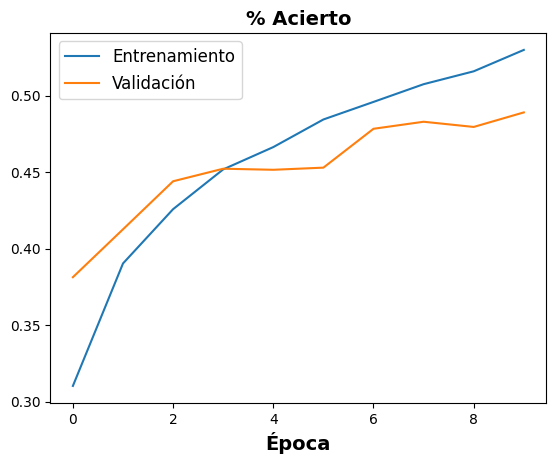

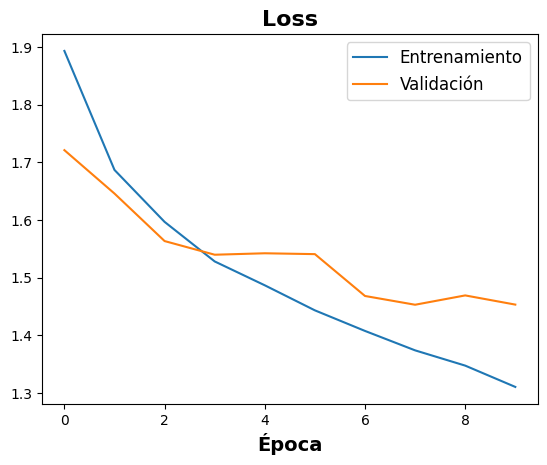

In [14]:
# Gráfica para el % de acierto
plt.plot(history_Capas.history['accuracy'], label='Entrenamiento')
plt.plot(history_Capas.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history_Capas.history['loss'], label='Entrenamiento')
plt.plot(history_Capas.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()


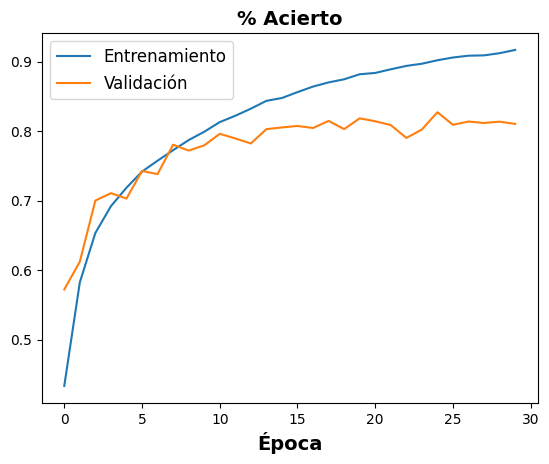

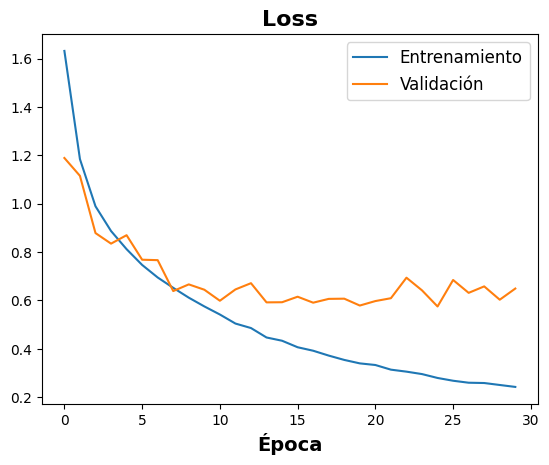

In [15]:
# Gráfica para el % de acierto
plt.plot(history_cnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history_cnn.history['loss'], label='Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()



---


## Discusiones



---



### ¿Existe sobreajuste? (responder 0,2 puntos y argumentar 0,8 puntos)

* En el experimento 1: se observa que en el %evaluación las curvas de Entrenamiento y Evaluación son bastante cercanas entre sí, estando la validación sobre el entrenamiento en algunas épocas, para luego estar oscilando en un aparente patrón repetitivo. En el gráfico de Loss tenemos un comportamiento similar al anterior: curvas similares que no tienen diferencias significativas y que están moviéndose en conjunto. Se puede concluir que se generaliza de manera razonable.

* En el experimento 2: Se observa en el gráfico de %evaluación que la curva de Entrenamiento sube hasta un punto superior al 90%, mientras que la validación fluctúa alrededor del 80%. Mientras, en el gráfico de Loss, vemos que el entrenamiento baja de forma constante, y las validaciones presentan un comportamiento similar al gráfico anterior, fluctuando con altibajos llegado al punto 0.6. Esto es un claro reajuste, ya que el modelo es incapaz de mejorar llegado a cierto punto e incluso empeora en algunas ocasiones, lo que indica que el modelo no generaliza bien, sino que memoriza los patrones.

### ¿Qué tan bien funciona una red feedforward con imágenes? - 0,2 puntos

¿Qué tan bien funciona una red feedforward con imágenes?
Una red feedfoward sirve con imágenes que se han aplastado previamente (como fue en este caso), pero no es ideal para este tipo de datos; las imágenes tienen una estructura que incluye alto, ancho y canales, que se pierde al transformar las imágenes a un vector plano, es decir: no aprovecha las conexiones entre pixeles, lo que limita la capacidad del modelo para aprender representaciones complejas.

El modelo logró un accuracy cercano al 42%, claramente inferior a una red CNN, lo que es una clara prueba de que, si bien la red feeforwars funciona con este tipo de imágenes, no funciona tan bien en comparación a la red CNN.

### Limitaciones encontradas en el desarrollo del trabajo (indicar 3) - 0,6 puntos

* Tiempo de entrenamiento en modelos complejos: Especialmente en la Red CNN, cuyo entrenamiento demoró 3 horas. Esto fue un impedimento para realizar pruebas continuas debido a lo tardío resultaba su entrenamiento, teniendo que serciorarse que el siguiente entrenamiento contenía lo necesario para las evaluaciones posteriores.

* Sobreajuste de la Red CNN: Pese a que se logró el Accuracy alto deseado, su comportamiento evidencia un sobreajuste que podría requerir un técnicas adicionales para ser regularizado, cosa que se complica realizar debido al tiempo que demora el entrenamiento para su posterior prueba.

* Falta de toma de tiempo: Si bien no fue un problema grave, que el modelo base no midiera el tiempo fue algo que como grupo generó confusión, pues era parte de una pregunta posterior. Una vez resuelto eso, se implementó en los modelos posteriores, pero limitó el tiempo del grupo al tener que repetir el entrenamiento de la red cnn.

---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
+ Faltas en redacción y ortografía - 10% de la calificación final
+ Incumplimiento de rendimiento exigido - 50% de la calificación final

---